In [1]:
import copy
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import time

In [2]:
#Q1
x = 11/7
y = type(x)
y

float

In [3]:
#Q2
fruit_list = ["apple", "pear", "banana", "watermelon"]
fruit_list_length = len(fruit_list)
minimum = 2
maximum = 5
in_range = minimum <= fruit_list_length <= maximum 
in_range

True

In [4]:
#Q3
filepath = "TESTING_DATA.CSV"
is_csv = filepath[-4:] == ".CSV"
is_csv

True

In [5]:
#Q4
value = -3
if value > 0:
    status = "positive"
elif value == 0:
    status = "zero"
else: 
    status = "negative"
status

'negative'

In [6]:
def multiply(a, b = 2):
    ans = a * b
    return ans

In [7]:
#Q5
x = multiply(11, 7)
x

77

In [8]:
#Q6
x = multiply(5)
x

10

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [10]:
def smart_multiply(numbers):
    product = 1
    for i in numbers:
        if i <= 0:
            continue
        product = product * i
        if product > 100:
            break
    return product

In [11]:
#Q7
x = smart_multiply(nums)
x

72

In [12]:
#Q8
x = smart_multiply([4, -2, 0, 5, 5, 2, 7, -2])
x

200

In [13]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y" : 5}
coord2 = {"x": 9, "y" : 2, "z": 4}
coord3 = {"x": 3, "y": 1, "z": 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

In [14]:
#Q9
coord1["z"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [15]:
#Q10
x = rows[-1][-1]['y']
x

1

In [16]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404
v2[1][1] = 404
x = rows
x

[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [17]:
#Q12
index_A = header.index("A")

sum_A = sum(row[index_A] for row in rows)

sum_A

9

In [18]:
#Q13
index_b = header.index("B")
sorted_rows = sorted((rows), key = lambda x : x[index_b], reverse=True)
sorted_rows

[[3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [19]:
#Q14
with open("usd.json") as f:
    data = json.load(f)
x = 400
y = data["cad"]["rate"]
cad_amount = x * y
cad_amount = round(cad_amount, 2)
cad_amount

547.23

In [20]:
def convert_to_int(x):
    try:
        return int(x)
    except ValueError:
        print("Could not convert string to int.")
        return None
    except:
        print("Error with your input argument.")
        return None

In [21]:
#Q15
x = convert_to_int("320")
x

320

In [22]:
#Q16
x = convert_to_int("ninety-nine")
x

Could not convert string to int.


In [23]:
#Q17
x = convert_to_int([3, 2, 0])
x

Error with your input argument.


In [24]:
grade_data = "grade-data"
grades = {}

files = os.listdir(grade_data)

for file in files:
    if file.endswith(".csv"):
        year = int(file.split('-')[-1].split('.')[0])
        
        df = pd.read_csv(os.path.join(grade_data, file))
        df. set_index("course", inplace=True)
        grades[year] = df

In [25]:
#Q18
x = list(grades.keys())
x

[2017, 2018, 2019, 2020, 2021, 2022]

In [26]:
#Q19
df_2022 = grades[2022]
comp_sci_320_gpa = df_2022.at["COMP SCI 320", "gpa"]
float(comp_sci_320_gpa)

3.325888236842226

In [27]:
#Q20
df_2022 = grades[2022]
cs_courses_2022 = df_2022.loc[df_2022["course_subject"] == "Computer Sciences"]
y = len(cs_courses_2022)
y

91

In [28]:
#Q21
total_a_count = cs_courses_2022["a_count"].sum()
int(total_a_count)

8479

In [29]:
#Q22
smallest_a_fraction = (cs_courses_2022["a_count"] / cs_courses_2022["total"]).min()
float(smallest_a_fraction)

0.18181818181818182

In [30]:
#Q23
fraction_a_dict = {}
filtered_df = df_2022.loc[df_2022['course_num'].between(300, 399) & (df_2022['course_subject'] == 'Computer Sciences')]
total_a_count = filtered_df['a_count']
total_students = filtered_df['total']
fraction_a = total_a_count / total_students
fraction_a_dict = fraction_a.to_dict()
fraction_a_dict
                        

{'COMP SCI 300': 0.4683698296836983,
 'COMP SCI 304': 0.8835616438356164,
 'COMP SCI 310': 0.345679012345679,
 'COMP SCI 319': 0.6567164179104478,
 'COMP SCI 320': 0.33044554455445546,
 'COMP SCI 352': 0.29277566539923955,
 'COMP SCI 354': 0.20095238095238097}

Text(0.5, 1.0, "Fraction of Students to Recieve an 'A' in 2022")

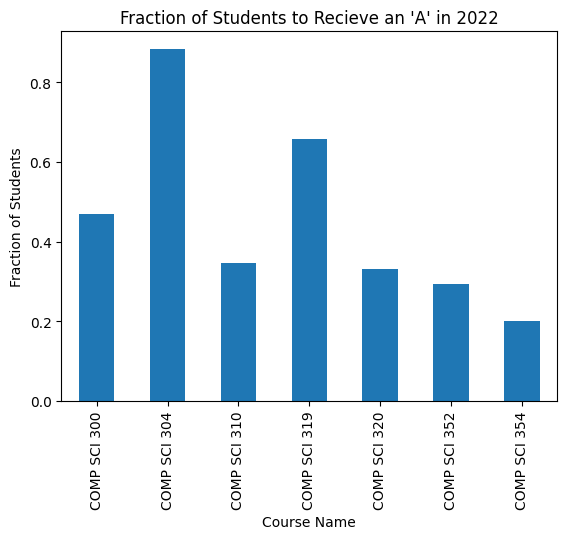

In [31]:
#Q24
plotted = fraction_a.plot.bar('HI', 1000)
plotted.set_xlabel("Course Name")
plotted.set_ylabel("Fraction of Students")
plotted.set_title("Fraction of Students to Recieve an 'A' in 2022")

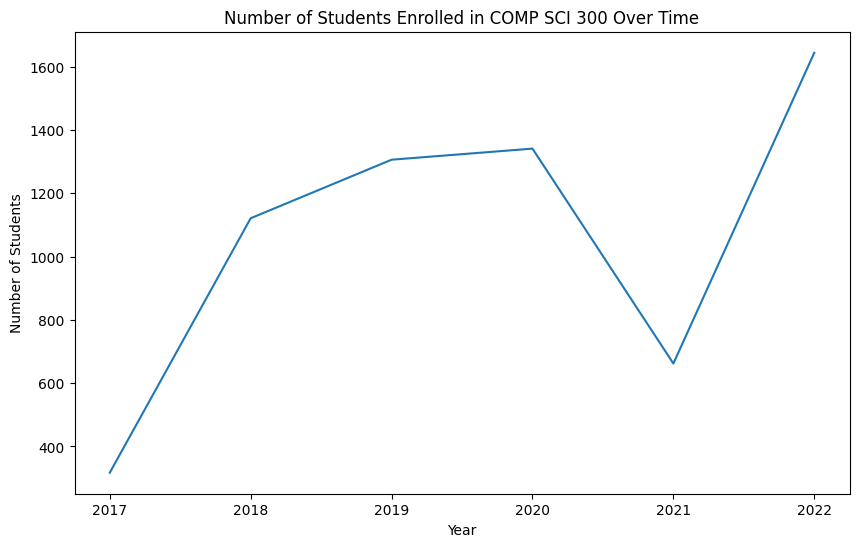

In [32]:
#Q25
comp_sci_300_data = [(year, df.loc["COMP SCI 300", "total",]) for year, df in grades.items() if "COMP SCI 300" in df.index]
comp_sci_300_df = pd.DataFrame(comp_sci_300_data, columns = ["Year", "Number of Students"])
plt.figure(figsize=(10, 6))
plt.plot(comp_sci_300_df["Year"], comp_sci_300_df["Number of Students"])
plt.title("Number of Students Enrolled in COMP SCI 300 Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.show()
        

<function matplotlib.pyplot.show(close=None, block=None)>

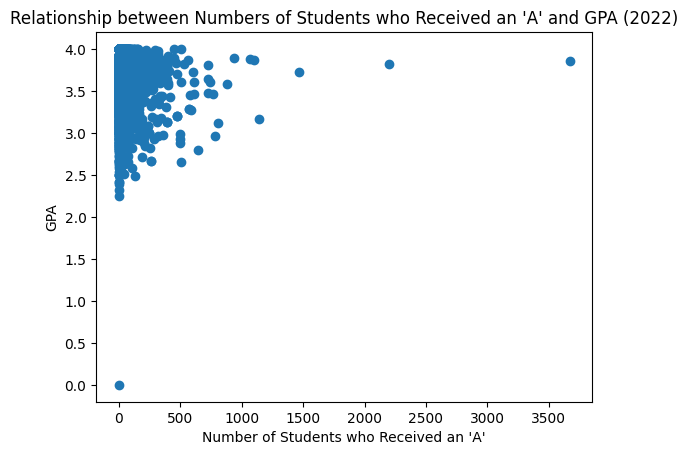

In [33]:
#Q26
df_2022 = grades[2022]
a_counts = df_2022['a_count']
gpas = df_2022['gpa']
plt.scatter(a_counts, gpas)
plt.title("Relationship between Numbers of Students who Received an 'A' and GPA (2022)")
plt.xlabel("Number of Students who Received an 'A'")
plt.ylabel("GPA")
plt.show

In [34]:
#Q27
try:
    result = subprocess.check_output(["git", "log"], cwd="flask")
    result_str = result.decode('utf-8')
    lines = result_str.splitlines()
    first_line = lines[0]
except subprocess.CalledProcessError as error:
    error

first_line

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [35]:
#Q28
x = []
for line in lines:  
    if line.startswith("commit"):
        x.append(line.split()[1])

commit_list_earliest = x[-10:]
commit_list_earliest

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [36]:
x[-100]

'f878919753a909e45b2d5448aa175f4f9129ff24'

In [37]:
#Q29
subprocess.check_call(["git", "checkout", "f878919753a909e45b2d5448aa175f4f9129ff24"], cwd = "flask")
with open("flask/README", "r") as readme_file:
    contents = readme_file.read()
contents

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [38]:
#Q30
subprocess.check_call(["git", "checkout", "main"], cwd="flask")

contributor_counts = {}

log_output = subprocess.check_output(["git", "log"], cwd="flask")
log_output_str = log_output.decode('utf-8')
log_lines = log_output_str.splitlines()

for entry in log_lines:
    if "Merge pull request" in entry or "Revert Merge pull request" in entry:
        components = entry.split('from ')
        if len(components) > 1:
            user = components[1].split('/')[0]
            if user in contributor_counts:
                contributor_counts[user] += 1
            else:
                contributor_counts[user] = 1

active_contributors = {user: count for user, count in contributor_counts.items() if count >= 10}

active_contributors

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


Your branch is up to date with 'origin/main'.


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [39]:
#Q31
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr = subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output

    
msg.decode('utf-8')

'ERROR: unknown command "instal" - maybe you meant "install"\n'

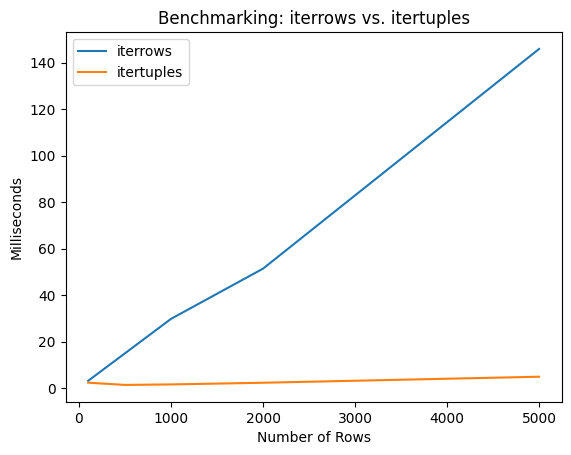

In [40]:
#Q32
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
rows_list = []
iterrows_times = []
itertuples_times = []

x = [100, 500, 1000, 2000, 5000]
for rows in x:
    df = rand_df(rows)
    
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    
    iterrows_time = (t1 - t0) * 1000
    iterrows_times.append(iterrows_time)
    
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    
    itertuples_time = (t1 - t0) * 1000
    itertuples_times.append(itertuples_time)
    
    rows_list.append(rows)
    
plt.title("Benchmarking: iterrows vs. itertuples")
plt.xlabel("Number of Rows")
plt.ylabel("Milliseconds")
plt.plot(rows_list, iterrows_times, label = "iterrows")
plt.plot(rows_list, itertuples_times, label = "itertuples")
plt.legend()
plt.show()

In [41]:
df = rand_df(500)
df

,A,B,C,D,E
r1,8,8,7,0,8
r2,5,0,0,1,9
r3,5,4,7,8,5
r4,9,1,8,4,8
r5,3,0,4,7,6
...,...,...,...,...,...
r496,4,4,2,4,3
r497,8,3,8,8,9
r498,3,8,3,3,4
r499,4,2,3,2,2


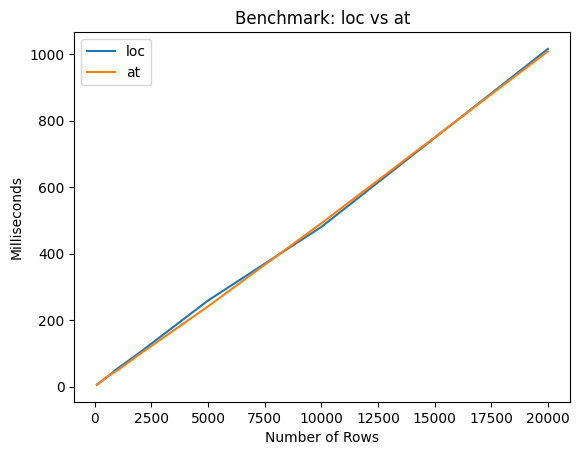

In [42]:
#Q33
row_counts = [100, 500, 1000, 2000, 5000, 10000, 20000]
loc_times = []
at_times = []

for count in row_counts:
    df = rand_df(count)
    
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    loc_times.append((t1 - t0) * 1000)
    
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    at_times.append((t1 - t0) * 1000)
    
    rows_list.append(count)
plt.plot(row_counts, loc_times, label = 'loc')
plt.plot(row_counts, at_times, label = 'at')
plt.xlabel('Number of Rows')
plt.ylabel('Milliseconds')
plt.title('Benchmark: loc vs at')
plt.legend()
plt.show()

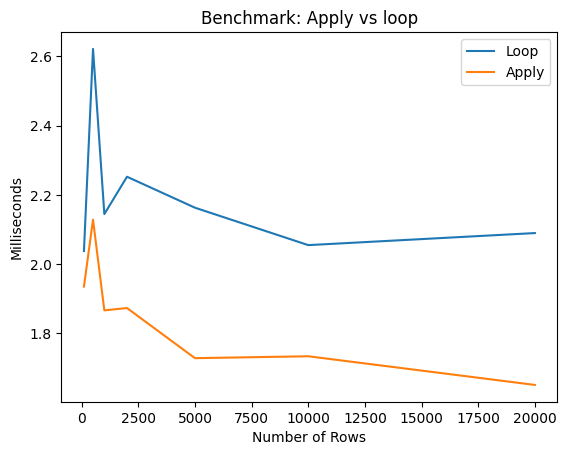

In [43]:
#Q34
def laugh(x):
    return "qwerty" * x

row_counts = [100, 500, 1000, 2000, 5000, 10000, 20000]
loop_times = []
apply_times = []


for count in row_counts:
    df = rand_df(rows)
    t0 = time.time()
    result = []
    for value in df["A"]:
        result.append(laugh(value))
    t1 = time.time()
    loop_times.append((t1 - t0) * 1000)
    
   
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    apply_times.append((t1 - t0) * 1000)
    
plt.xlabel('Number of Rows')
plt.ylabel('Milliseconds')
plt.plot(row_counts, loop_times, label = 'Loop')
plt.plot(row_counts, apply_times, label = 'Apply')
plt.title('Benchmark: Apply vs loop')
plt.legend()
plt.show()